# Factors affecting Taxi rides

## 1. Load and Check data
We will load datasets, inspect them for any errors, fix if any with explanations.

In [1]:
# necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
#load the data files
try:
    rides=pd.read_csv('/datasets/project_sql_result_01.csv')
    nbhoods=pd.read_csv('/datasets/project_sql_result_04.csv')
    to_airport=pd.read_csv('/datasets/project_sql_result_07.csv')
    print('All files has been imported!')
except:
    print('Something went wrong, check paths, separators etc!')

All files has been imported!


In [3]:
# get familiarized with content and data types of datasets 
for df in [rides, nbhoods, to_airport]:
    display(df.head(3))
    df.info()
    print()
    print('='*50)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB



,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB



,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB



In [4]:
#change data type of to_airport['start_ts'] to datetime
to_airport['start_ts'] = pd.to_datetime(to_airport['start_ts'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

#check the result
to_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [5]:
# check for missing and duplicated values in each dataset
for df in [rides, nbhoods, to_airport]:
    display(df.isna().sum())
    print('Duplicated number of rows:', df.duplicated().sum())
    print('='*50)

company_name    0
trips_amount    0
dtype: int64

Duplicated number of rows: 0


dropoff_location_name    0
average_trips            0
dtype: int64

Duplicated number of rows: 0


start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Duplicated number of rows: 197


### 1.1 Conclusion
All three dataset has been successfully loaded and been got familiarized. Datatypes of columns were correct, except the `start_ts` column of the to_airport dataset. It was in *object* type and then converted to *datetime* type. Datasets have been check for missing and duplicate values. No significant issues were observed other than duplicates in the to_airport table. However, we don't have a trip_id column, therefore we can not exactly say if these rows are duplicated or separate observations with equal values. Hence, it was decided to keep them!

## 2. Explaratory data analysis
We will make graphs: to analyze companies by number of rides and neighborhoods by number of drop-offs.

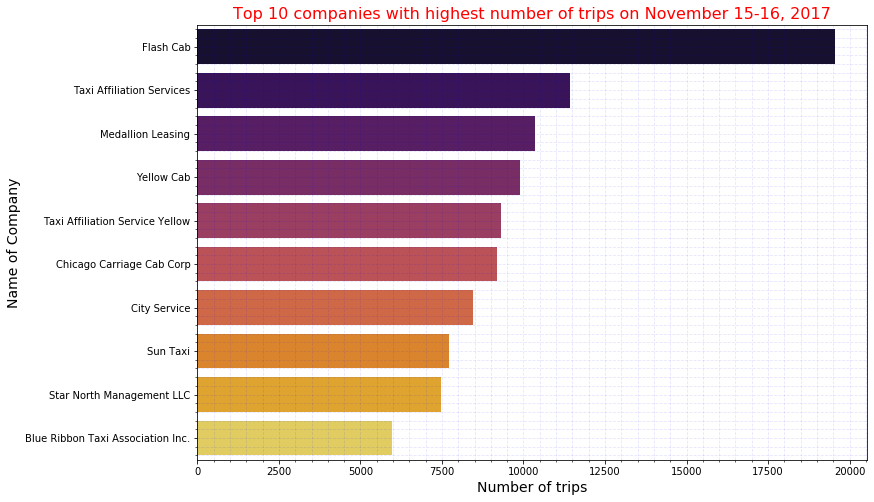

In [6]:
#prepare data: top companies with most trips on November 15-16, 2017
data=rides.sort_values('trips_amount', ascending=False)[:10]

#create fig object
plt.figure(figsize=(12,8))

#horizontal bar chart showing number of trips per company
sns.barplot(x='trips_amount', y='company_name', data=data, palette='inferno')

#customize the plot
plt.title('Top 10 companies with highest number of trips on November 15-16, 2017', fontsize=16, color='r')
plt.xlabel('Number of trips', fontsize=14, color='k')
plt.ylabel('Name of Company', fontsize=14, color='k')
plt.grid(b=True, which='both', color='b', linestyle='--', alpha=0.1)
plt.minorticks_on()
plt.show()

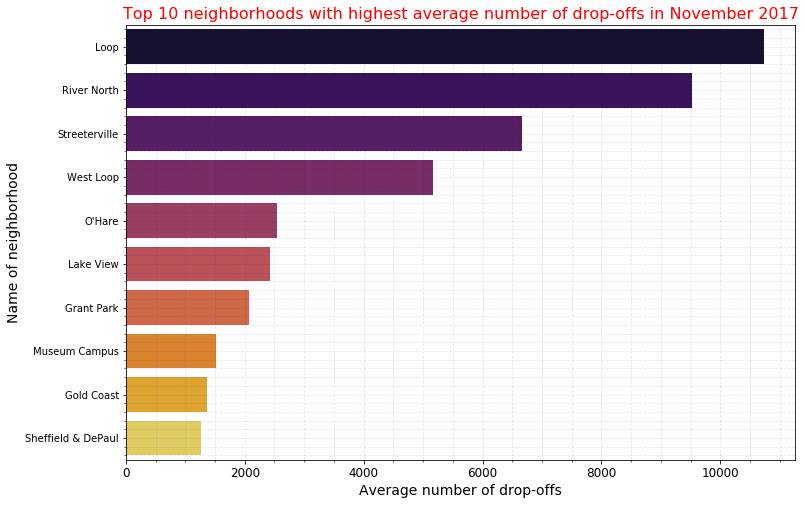

In [7]:
#prepare data: top neighborhoods with most drop-offs in November 2017
data=nbhoods.sort_values('average_trips', ascending=False)[:10]

#create figure object
plt.figure(figsize=(12,8))

#h.bar chart showing top neighborhoods with highest avg. drop-offs
sns.barplot(y='dropoff_location_name', x='average_trips', data=data, palette='inferno')

#customize the plot
plt.title('Top 10 neighborhoods with highest average number of drop-offs in November 2017', fontsize=16, color='r')
plt.xticks(rotation=0, fontsize=12)
plt.xlabel('Average number of drop-offs', fontsize=14, color='k')
plt.ylabel('Name of neighborhood', fontsize=14, color='k')
plt.grid(b=True, which='both', color='b', linestyle='--', alpha=0.1)
plt.minorticks_on()
plt.show()

In [8]:
data=rides.sort_values('trips_amount', ascending=False)[:10]
data

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


### 2.1 Conclusion
As its name refers, the **Flash Cab** company was flashing on November 15-16, 2017 with around **20k trips**. The second company was the **Taxi Affiliation Services with around 11k** trips, which less than 2/3 of the Flash Cab. Again, 11k is still very successfully when we consider that there were some companies with only several trips on that date. However, to get a better comparison, it would be great if we could compare the number of cabs each company owns. In such a case, we can clearly say which company was efficient. For example, maybe one company has only 5 cabs but performed 200 rides, while Flash Cab has 20k cabs and made 20k trips.

More than **10k taxi rides ended in the Loop**- a vibrant neighborhood of Chicago with eclectic eateries, shops, theaters and parks! Next comes the neighborhoods **River North, the Streeterville, and the West Loop - all of them have drop-offs of above 5k**. For the rest of the neighborhoods, the number of drop-offs decreases gradually. The high number of trips ending in specific neighborhoods might be closely related to the population, businesses and attraction centers in that neighborhood.

## 3. Test hypothesis
We will check if "The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays" or not. For this task we are going to define our hypothesis as follow:
   - NULL hypothesis: trip durations are equal (or not significantly different) regardless of weather conditions;
   - Alternative hypothesis: trip durations differ significantly depending on weather conditions.
   
As a generally accepted limit, 95% confidence is enough for us, hence alpha=0.05

Before jumping into statistical testing, let's first get the required data from the `to_airport` dataset and visualize their distribution.

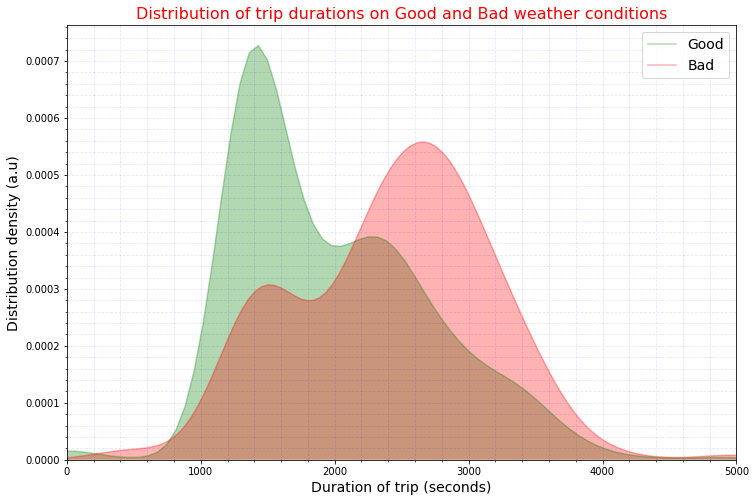

In [9]:
#data we need is trip durations on good and bad weather conditions
good=to_airport[to_airport['weather_conditions'] == 'Good']['duration_seconds']
bad=to_airport[to_airport['weather_conditions'] == 'Bad']['duration_seconds']

#create figure object
plt.figure(figsize=(12,8))

#plot distribution curves for each weather conditions
sns.distplot(good, hist=False, kde_kws={'shade':True, 'color':'green', 'alpha':0.3}, label='Good')
sns.distplot(bad, hist=False, kde_kws={'shade':True, 'color':'red', 'alpha':0.3}, label='Bad')

#customize the figure
plt.title('Distribution of trip durations on Good and Bad weather conditions', fontsize=16, color='r')
plt.xlabel('Duration of trip (seconds)', fontsize=14, color='k')
plt.ylabel('Distribution density (a.u)', fontsize=14, color='k')
plt.xlim(0, 5000) #there are some extreme values, we don't need to show them for now
plt.legend(fontsize=14)
plt.grid(b=True, which='both', color='b', linestyle='--', alpha=0.1)
plt.minorticks_on()
plt.show()

In [10]:
#student's t-test for comparison of two distributions
alpha=0.05 #95% confidence level

#test difference of mean of good and bad
test_result = st.ttest_ind(good, bad, equal_var=False)
print('P-value of the test is:',test_result.pvalue)

if test_result.pvalue < alpha:
    print('We reject the null hypothesis! \nAn average trip duration of {}\u00B1{} on good weather conditions is significantly \
lower than average trip duration of {}\u00B1{} on bad weather conditions.'\
          .format(round(good.mean(), 2), round(good.std(), 2), round(bad.mean(), 2), round(bad.std(), 2)))
else:
    print('We reject the null hypothesis! \nAn average trip duration of {}\u00B1{} on good weather conditions IS NOT significantly \
DIFFERENT than average trip duration of {}\u00B1{} on bad weather conditions.'\
          .format(round(good.mean(), 2), round(good.std(), 2), round(bad.mean(), 2), round(bad.std(), 2)))

P-value of the test is: 6.738994326108734e-12
We reject the null hypothesis! 
An average trip duration of 1999.68±759.2 on good weather conditions is significantly lower than average trip duration of 2427.21±721.31 on bad weather conditions.


### 3.1 Conclusion
From the prior visualization, it has been observed that the peak of the plot of average trip durations on good weather conditions was located on the right compared to average trip durations on bad weather conditions. When the statistical analysis performed, it was seen that indeed average trip durations in good weather conditions was significantly lower than average trip durations in bad weather conditions (1999.68±759.2 vs 2427.21±721.31).

## 4. Summary
All three dataset has been successfully loaded and been got familiarized. Datatypes of columns were correct, except the `start_ts` column of the to_airport dataset. It was in *object* type and then converted to *datetime* type. Datasets have been check for missing and duplicate values. No significant issues were observed other than duplicates in the to_airport table. However, we don't have a trip_id column, therefore we can not exactly say if these rows are duplicated or separate observations with equal values. Hence, it was decided to keep them!


As its name refers, the **Flash Cab** company was flashing on November 15-16, 2017 with around **20k trips**. The second company was the **Taxi Affiliation Services with around 11k** trips, which less than 2/3 of the Flash Cab. Again, 11k is still very successfully when we consider that there were some companies with only several trips on that date. However, to get a better comparison, it would be great if we could compare the number of cabs each company owns. In such a case, we can clearly say which company was efficient. For example, maybe one company has only 5 cabs but performed 200 rides, while Flash Cab has 20k cabs and made 20k trips.

More than **10k taxi rides ended in the Loop**- a vibrant neighborhood of Chicago with eclectic eateries, shops, theaters and parks! Next comes the neighborhoods **River North, the Streeterville, and the West Loop - all of them have drop-offs of above 5k**. For the rest of the neighborhoods, the number of drop-offs decreases gradually. The high number of trips ending in specific neighborhoods might be closely related to the population, businesses and attraction centers in that neighborhood.

When the statistical analysis performed, it was seen that the average trip durations in **good weather conditions (1999.68±759.2)** was significantly lower than average trip durations in **bad weather conditions (2427.21±721.31)**.